# Number counter using MapReduce algorithm

Given: A CSV file with a large amount of numbers<br>
Task: Implement number counter, use the MapReduce algorithm and plot the occurrences of the numbers

The MapReduce algorithm can be divided into three phases:
1. Map
1. Shuffle
1. Reduce

### 1. Map
For each occurrence of a number, an entry is created with the corresponding number and a '1' as the counter status.<br>
E.g. [1,1,2] => [(1,1), (1,1), (2,1)]

```python
def mapper(number_list: list)->[(int,int)]:
    """Mapper function (as generator) of the mapreduce algortihm"""
    for number in number_list:
        yield(number,1)
        
# 1. map
    mapped_list = mapper(list_of_valid_numbers)
```  

### 2. Shuffle
The intermediate results of the map phase are taken over and the individual entries are summarized so that the corresponding numbers refer to a list of 1s.<br>
E.g. [(1,1), (1,1), (2,1)] => {1:[1,1], 2:[1]}

```python
# 2. shuffle
    shuffle_dict = defaultdict(list) 
    for number,count in mapped_list:
        shuffle_dict[number].append(count)
```        

### 3. Reduce
Now the intermediate results of the shuffle phase are reduced by summing the list of 1s so that only a single number determines the occurrence of the corresponding number, e.g. {1:[1,1], 2:[1]} => {1:[2], 2:[1]}

```python
def reducer(number_dict: defaultdict(list))->[(int,int)]:
    """Reducer function (as generator) of the mapreduce algorithm"""
    for number in number_dict:
        yield(number,sum(number_dict[number])) 

# 3. reduce
    # The finished List (of tuples) from mapreduce, containing the numbers and their counts
    mpr_list = list(reducer(shuffle_dict))
```    

## The whole program

In [6]:
import csv
from collections import defaultdict
from prettytable import PrettyTable     # for output in table form

def mapper(number_list: list)->[(int,int)]:
    """Mapper function (as generator) of the mapreduce algortihm"""
    for number in number_list:
        yield(number,1)


def reducer(number_dict: defaultdict(list))->[(int,int)]:
    """Reducer function (as generator) of the mapreduce algorithm"""
    for number in number_dict:
        yield(number,sum(number_dict[number])) 

        
# open CSV file and read
with open('P.csv','r') as file:
    csvreader = csv.reader(file,delimiter=';')
    list_of_valid_numbers = []    # contains the valid numbers of the csv file
    
    # for each line in the csv file
    for number_list in csvreader:
        # for each cell (number) in the csv file
        for cell in number_list:
            try:
                int(cell)   # validate number
                list_of_valid_numbers.append(cell)
            except:
                continue
    
    # 1. map
    mapped_list = mapper(list_of_valid_numbers)
    # 2. shuffle
    shuffle_dict = defaultdict(list) 
    for number,count in mapped_list:
        shuffle_dict[number].append(count)
    # 3. reduce
    # The finished List (of tuples) from mapreduce, containing the numbers and their counts
    mpr_list = list(reducer(shuffle_dict))
    
    # Sort the finished mapreduce list (of tuples)
    sorted_count_list = sorted(mpr_list,key=lambda tup:int(tup[0]))
    
    # Generate a table for the number and counts
    x = PrettyTable(['number','count'])
    for number, count in sorted_count_list:
        x.add_row([number,count])
    # print the numbers and counts in a table form
    print(x)

+--------+-------+
| number | count |
+--------+-------+
|  -463  |   1   |
|  -396  |   2   |
|  -393  |   1   |
|  -392  |   1   |
|  -383  |   1   |
|  -380  |   1   |
|  -378  |   1   |
|  -377  |   1   |
|  -374  |   1   |
|  -373  |   1   |
|  -368  |   1   |
|  -367  |   1   |
|  -365  |   3   |
|  -362  |   1   |
|  -361  |   1   |
|  -360  |   1   |
|  -355  |   2   |
|  -353  |   3   |
|  -352  |   1   |
|  -351  |   1   |
|  -350  |   1   |
|  -348  |   2   |
|  -346  |   1   |
|  -345  |   2   |
|  -342  |   2   |
|  -339  |   3   |
|  -337  |   3   |
|  -336  |   1   |
|  -335  |   2   |
|  -333  |   2   |
|  -331  |   2   |
|  -330  |   1   |
|  -329  |   2   |
|  -327  |   1   |
|  -326  |   2   |
|  -325  |   3   |
|  -324  |   1   |
|  -323  |   2   |
|  -321  |   1   |
|  -320  |   4   |
|  -319  |   2   |
|  -318  |   2   |
|  -317  |   3   |
|  -316  |   5   |
|  -315  |   5   |
|  -314  |   3   |
|  -313  |   2   |
|  -312  |   2   |
|  -311  |   4   |
|  -310  |  

### Plot the result of the MapReduce algorithm in sorted order

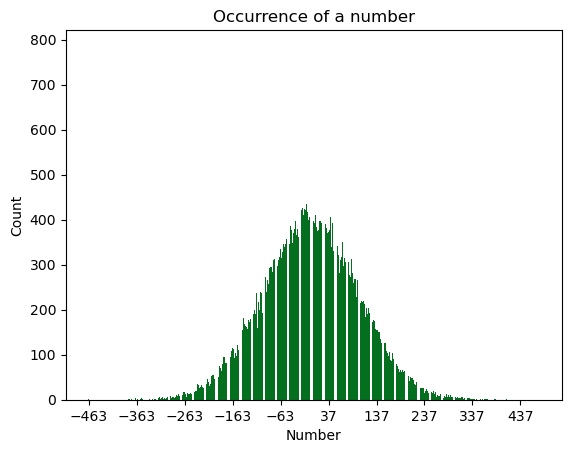

In [128]:
import matplotlib.pyplot as plt

# Extract the numbers and counts (from sorted-list) in different lists
number_list = list(map(int,[tup[0] for tup in sorted_count_list]))
count_list = list(map(int,[tup[1] for tup in sorted_count_list]))

# Set the plotting and show
plt.title("Occurrence of a number")
plt.xlabel("Number")
plt.ylabel("Count")
plt.bar(number_list,count_list,color="#04701f")
plt.xticks(range(min(number_list),max(number_list)+1,100))
plt.show()